In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#new commit
#new 02
#new new


In [10]:
df = pd.read_csv("s3://david-credit-221001/datos/original/david_credit_data.csv",  index_col=0)

In [19]:
df['Risk'].value_counts()/df['Risk'].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [21]:
train, test = train_test_split(df, test_size=0.3, 
                               random_state=42,
                              stratify=df['Risk'])

In [22]:
test['Risk'].value_counts()/test['Risk'].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [26]:
train.to_csv("s3://david-credit-221001/datos/train/train.csv", index=False)

In [24]:
test.to_csv("s3://david-credit-221001/datos/test/test.csv", index=False)

In [36]:
train.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [37]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
328,31,male,2,own,little,rich,4473,36,radio/TV,good
891,46,male,2,own,little,NaN,1829,15,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
243,27,female,2,own,little,NaN,1185,12,business,good
492,27,female,2,own,moderate,NaN,1237,6,radio/TV,good


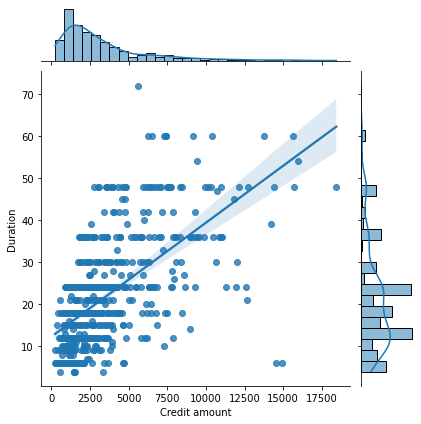

In [40]:
sns.jointplot(x = "Credit amount", y = "Duration", data = train,kind='reg')

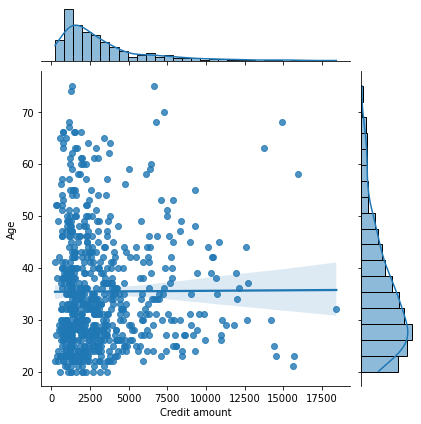

In [41]:
sns.jointplot(x = "Credit amount", y = "Age", data = train,kind='reg')

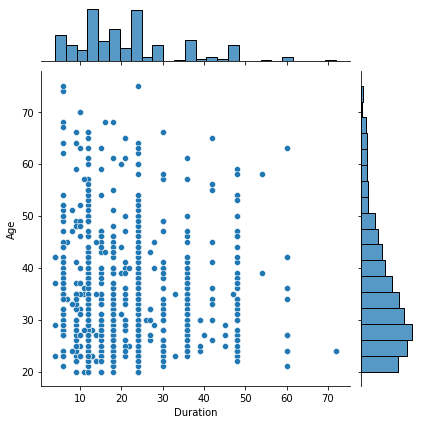

In [39]:
sns.jointplot(x = "Duration", y = "Age", data = train)

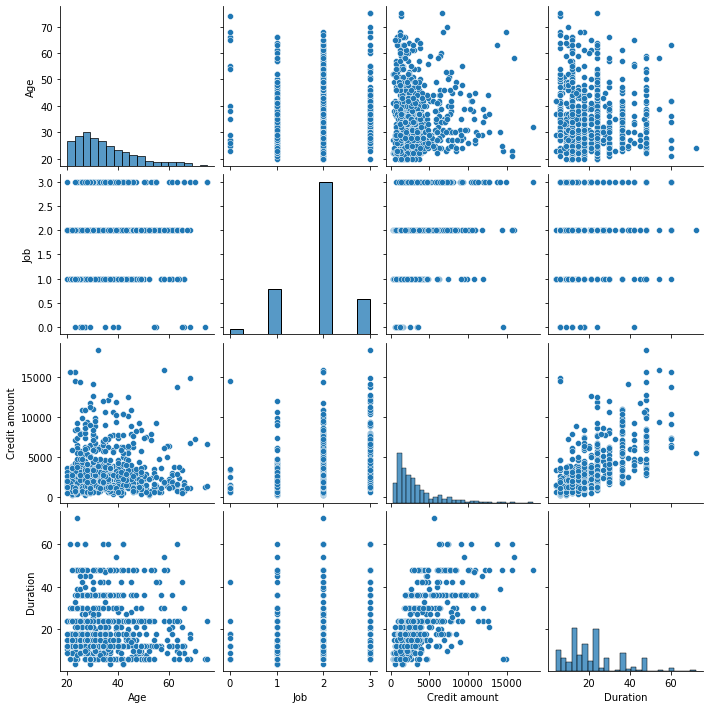

In [42]:
sns.pairplot(train)

In [49]:
table_sex =pd.crosstab(index=train['Sex'], columns=train['Risk'], margins= True)

In [52]:
table_sex['prob'] = table_sex.iloc[:,1]/table_sex.iloc[:,2]
table_sex

Risk,bad,good,All,prob
Sex,,,,
female,76,138,214,0.64486
male,134,352,486,0.72428
All,210,490,700,0.70000


In [54]:
table_housing =pd.crosstab(index=train['Housing'], columns=train['Risk'], margins= True)
table_housing['prob'] = table_housing.iloc[:,1]/table_housing.iloc[:,2]
table_housing

Risk,bad,good,All,prob
Housing,,,,
free,29,45,74,0.608108
own,133,371,504,0.736111
rent,48,74,122,0.606557
All,210,490,700,0.700000


In [57]:
table_age =pd.crosstab(index=train['Age'], columns=train['Risk'], margins= True)
table_age['prob'] = table_age.iloc[:,1]/table_age.iloc[:,2]
#table_age

# Preprocesamiento

In [ ]:
#Formas de imputación

In [58]:
from sklearn.impute import SimpleImputer

In [60]:
X_train = train[['Age', 'Credit amount', 'Duration']]

In [61]:
imputer = SimpleImputer(strategy='mean')

In [62]:
imputer.fit(X_train)

SimpleImputer()

In [65]:
imputer.statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [68]:
imputer.transform([[24,1000,np.nan],
                 [np.nan,np.nan,12]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  24.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [70]:
imputer.fit_transform(X_train)

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [86]:
from sklearn.impute import KNNImputer

In [87]:
imputer = KNNImputer(n_neighbors=2)

In [88]:
d = {'peso': [40, 42,44,45,39,80,82], 'edad': [19,20,21,23,25,27,30], 'nota':[3.0,3.1,None,4.1,5.0,None,4.8]}
dfs = pd.DataFrame(data=d)
dfs

,peso,edad,nota
0,40,19,3.0
1,42,20,3.1
2,44,21,NaN
3,45,23,4.1
4,39,25,5.0
5,80,27,NaN
6,82,30,4.8


In [89]:
result = imputer.fit_transform(dfs)
result

array([[40.  , 19.  ,  3.  ],
       [42.  , 20.  ,  3.1 ],
       [44.  , 21.  ,  3.6 ],
       [45.  , 23.  ,  4.1 ],
       [39.  , 25.  ,  5.  ],
       [80.  , 27.  ,  4.45],
       [82.  , 30.  ,  4.8 ]])

In [91]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [94]:
scaler = StandardScaler()

In [96]:
scaler.fit(X_train[['Age']])

StandardScaler()

In [99]:
scaler.mean_

array([35.40285714])

In [101]:
scaler.var_**0.5

array([11.23479253])

In [102]:
scaler.transform(X_train[['Age']])

array([[-0.39189483],
       [ 0.94324331],
       [-0.74793167],
       [-0.74793167],
       [-0.74793167],
       [ 0.05315121],
       [-0.035858  ],
       [-1.0149593 ],
       [-0.48090404],
       [ 1.12126173],
       [-0.48090404],
       [-1.28198693],
       [ 1.65531698],
       [-1.10396851],
       [-0.65892246],
       [-0.65892246],
       [ 1.29928014],
       [ 1.03225252],
       [-0.74793167],
       [ 1.8333354 ],
       [ 2.27838145],
       [ 1.12126173],
       [-0.21387641],
       [-0.83694088],
       [ 0.58720647],
       [ 1.03225252],
       [-0.74793167],
       [ 1.38828935],
       [-0.74793167],
       [-0.035858  ],
       [ 2.27838145],
       [ 1.74432619],
       [ 0.23116963],
       [ 0.32017884],
       [ 0.05315121],
       [-0.65892246],
       [-0.92595009],
       [-0.035858  ],
       [ 1.38828935],
       [ 0.23116963],
       [ 0.05315121],
       [-1.10396851],
       [-0.39189483],
       [-0.92595009],
       [ 0.40918805],
       [-0